### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


### Дисциплина:  Интеллектуальный анализ данных

## Москва 2022
***

### Вариант № 1

1.	Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI. Набор данных задан ссылкой на страницу набора данных и названием файла с данными, который доступен из папки с данными (data folder). 


In [1]:
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectKBest,f_classif
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.decomposition import PCA 
dannie = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data", header=None, sep=',')

In [2]:
dannie

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
794,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
796,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


2.	Проведите исследование набора данных, выявляя числовые признаки. Если какие-то из числовых признаков были неправильно классифицированы, то преобразуйте их в числовые. Если в наборе для числовых признаков присутствуют пропущенные значения ('?'), то заполните их медианными значениями признаков.


In [3]:
dannie = dannie.replace('?', np.NaN) # заменим '?' на np.NaN
print('Число записей = %d' % (dannie.shape[0]))
print('Число признаков = %d' % (dannie.shape[1]))

print('Число пропущенных значений:')
for col in dannie.columns:
    print('\t%s: %d' % (col,dannie[col].isna().sum()))

Число записей = 798
Число признаков = 39
Число пропущенных значений:
	0: 687
	1: 0
	2: 70
	3: 0
	4: 0
	5: 675
	6: 271
	7: 283
	8: 0
	9: 703
	10: 790
	11: 217
	12: 785
	13: 797
	14: 680
	15: 736
	16: 609
	17: 662
	18: 798
	19: 775
	20: 791
	21: 730
	22: 798
	23: 796
	24: 772
	25: 798
	26: 793
	27: 753
	28: 798
	29: 798
	30: 798
	31: 0
	32: 0
	33: 0
	34: 0
	35: 740
	36: 0
	37: 789
	38: 0


In [4]:
dannie = dannie.select_dtypes(exclude='object')

In [5]:
dannie = dannie.fillna(dannie.mean())
dannie.isna().sum()

3       0
4       0
8       0
18    798
22    798
25    798
28    798
29    798
30    798
32      0
33      0
34      0
36      0
dtype: int64

In [6]:
dannie = dannie.drop([18,22,25,28,29,30],axis=1)

3.	Определите столбец, содержащий метку класса (отклик). Если столбец, содержащий метку класса (отклик), принимает более 10 различных значений, то выполните дискретизацию этого столбца, перейдя к 4-5 диапазонам значений. 


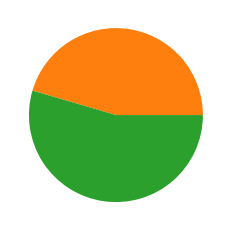

In [7]:
plt.pie(dannie[36].unique());

4.	При помощи класса `SelectKBest` библиотеки scikit-learn найдите в наборе два признака, имеющих наиболее выраженную взаимосвязь с (дискретизированным) столбцом с меткой класса (откликом). Используйте для параметра `score_func` значения `chi2` или `f_classif`. 


In [8]:
print("\nИсходный набор данных:\n",dannie.head())
X = dannie.drop([36],axis=1)
Y = dannie[36]
test = SelectKBest(score_func=f_classif, k=2)
fit = test.fit(X, Y)
print("\nОценки признаков:\n",fit.scores_)
cols = test.get_support(indices=True)
df_new = dannie.iloc[:,cols]
print("\nОтобранные признаки:\n",df_new.head())


Исходный набор данных:
    3   4   8      32      33   34  36
0   8   0   0  0.700   610.0    0   0
1   0   0   0  3.200   610.0    0   0
2   0   0   0  0.700  1300.0  762   0
3   0  60   0  2.801   385.1    0   0
4   0  60   0  0.801   255.0  269   0

Оценки признаков:
 [35.31930807 12.53563393  0.60362046 73.89274252  0.65319582  9.53328814]

Отобранные признаки:
    3      32
0   8  0.700
1   0  3.200
2   0  0.700
3   0  2.801
4   0  0.801


5.	Для найденных признаков и (дискретизированного) столбца с меткой класса (откликом) вычислите матрицу корреляций и визуализируйте ее в виде тепловой карты (heat map). 


          3         32        36
3   1.000000  0.180355  0.240125
32  0.180355  1.000000  0.395915
36  0.240125  0.395915  1.000000


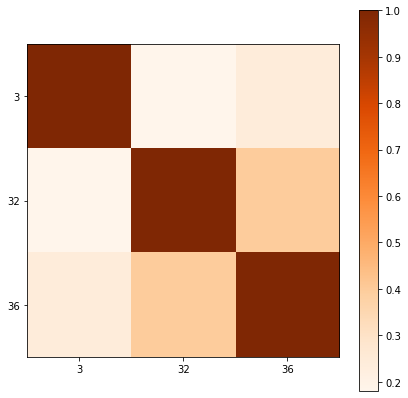

In [9]:
corr_matrix = dannie[[3,32,36]].astype(float).corr()
print (corr_matrix)
plt.figure(figsize=(7, 7))
plt.imshow(corr_matrix, cmap='Oranges')
plt.colorbar()

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix)), corr_matrix.index);

6.	Визуализируйте набор данных в виде диаграммы рассеяния на плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.


Text(0.5, 1.0, 'RIS')

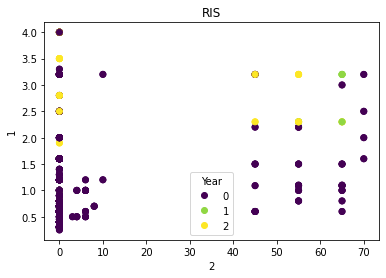

In [10]:
plt.scatter(dannie[3].astype(int), dannie[32].astype(float), c=dannie[36])
plt.legend(handles=plt.scatter(dannie[3].astype(int), dannie[32].astype(float), c=dannie[36]).legend_elements()[0], labels=['0','1', '2'],title="Year")

plt.xlabel('2')
plt.ylabel('1')
plt.title('RIS')

7.	Оставляя в наборе данных только числовые признаки, найдите и выведите на экран размерность метода главных компонент (параметр `n_components`), для которой доля объясняемой дисперсии будет не менее 97.5%.


In [11]:
for r in range(1,3):
    pca = PCA( n_components = r )
    pca.fit(dannie)
    print( "r =",r,"\tДисперсия =",sum(pca.explained_variance_ratio_)*100,"%" )

r = 1 	Дисперсия = 94.93182171932183 %
r = 2 	Дисперсия = 99.222197808476 %


8.	Пользуясь методом главных компонент (PCA), снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде диаграммы рассеяния на плоскости, образованной двумя полученными признаками, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

Объясняемая дисперсия: 99.62429778079269
[[-1277.40908581  -135.22550362]
 [-1277.40140666  -135.22826428]
 [ -495.59932181   532.1385195 ]
 [-1284.04681906  -359.98773774]
 [-1018.95802398  -497.83452477]]


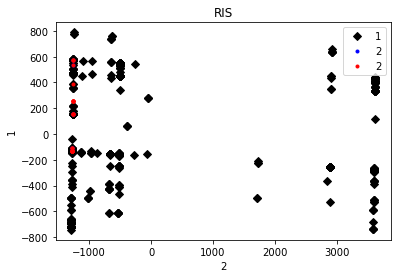

In [12]:
pca = PCA(n_components=2)
fit = pca.fit(dannie.drop([36],axis=1))
features = fit.transform(dannie.drop([36],axis=1))
print("Объясняемая дисперсия:", sum(fit.explained_variance_ratio_)*100)
print(features[0:5,:])
plt.plot(features[dannie[36]==0,0],features[dannie[36]==0,1],"Dk", label='1') 
plt.plot(features[dannie[36]==500,0],features[dannie[36]==500,1],"b.", label='2') 
plt.plot(features[dannie[36]==600,0],features[dannie[36]==600,1],"r.", label='2') 
plt.xlabel('2')
plt.ylabel('1')
plt.title('RIS')
plt.legend()